### Homework 4: Discover the Higgs Boson!

For this worksheet, we provide you with a (simplified) version of the simulated Higgs boson data challenge, run by Kaggle in 2014. The files are called "Higgs_features.csv" and "Higgs_labels.csv". The labels are 0 and 1, corresponding to "no Higgs signal", and "Higgs signal".

1\. Read the data into two numpy arrays or data frames, one for features and one for labels.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

features = np.loadtxt('Higgs_features.csv', delimiter = ',')
labels =   np.loadtxt('Higgs_labels.csv')

2\. How many instances and features are in this data set?

In [2]:
print('number of instances: {}'.format(np.shape(features)[0]))
print('number of features: {}'.format(np.shape(features)[1]))

number of instances: 25000
number of features: 8


3\. Plot the distribution of each feature for this data set in a histogram, in one plot. Add a legend (with labels "Feature 1", "Feature 2"...) and set the transparency of the histograms (property "alpha") to 0.5 for clarity. Hint: make sure you are plotting each column, not each row!

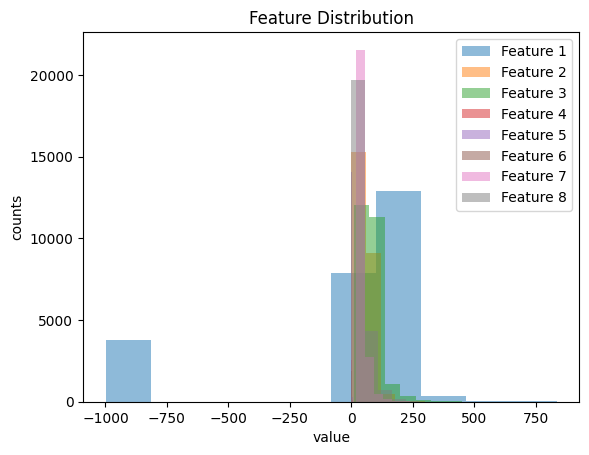

In [3]:
for i in range(8):
    counts, bins = np.histogram(features[:,i])
    plt.hist(bins[:-1], bins, weights=counts, label = 'Feature {}'.format(i+1), alpha = 0.5)

plt.legend()
plt.title("Feature Distribution")
plt.xlabel("value")
plt.ylabel("counts")
plt.show()

4\. Do you see anything unusual in the distribution of any of the features? What problem could this cause?

- feature one's distribution has a significant outliers
- this could skew our results when we use models that are sensitive to outliers such as Linear Regression with  MSE

5\. How many positive (Higgs) events does your data set contain? Based on this, is the data set balanced or unbalanced?

- moderately unbalanced

In [4]:
print('positive: {:.1f}%'.format(np.sum(labels)/len(labels) * 100))

positive: 33.9%


6\. On the basis of your answer to 5, which evaluation metric (accuracy, precision, recall) would you like to pick for this data set?

- accuracy would be 76% if we use the lazy classifier which is not ideal.

- recall could include many false positives which is not great as we are trying to confident in our positive predictions.

 - Because finding the Higgs Boson is a big deal, it would be unfortunate to have any false positives. So the ideal scoring would be precision as we want to be very confident when we predict the higgs boson even if we miss it sometimes.

7\. Use a decision tree classifier as your model, and do five fold cross validation on your data, <b> using the scoring parameter you chose above</b>. Report the mean and standard deviation of the scores obtained for the five folds.

Note: If you simply set the parameter "cv = 5" in the cross_val_score function, this will divide the data in five sets using the first 20%, second 20%... etc of your data, which is not great if your data are in a specific order. Make sure you use cv = StratifiedKFold(shuffle=True, n_splits=5).


In [5]:
model = DecisionTreeClassifier()
cv = StratifiedKFold(shuffle=True, n_splits=5)
scores = cross_val_score(model, features, labels,  cv = cv, scoring = 'precision')
print('mean: {:.2f}'.format(np.mean(scores)))
print('std: {:.4f} '.format(np.std(scores)))

mean: 0.64
std: 0.0075 


8\. We want to now take a look at the confusion matrix for your classifier. Generate the predicted label using the "cross_val_predict" function, then print the confusion matrix.

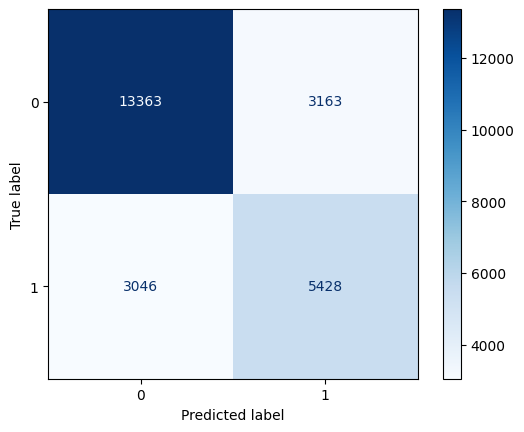

In [6]:
predicted = cross_val_predict(model, features, labels, cv=cv)
conf = confusion_matrix(labels, predicted)
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap=plt.cm.Blues)
plt.show()

9\. Given your confusion matrix, how many true positives / true negatives / false positives / false negatives are there? Do you have more type I errors (false positives) than type II errors (false negatives)?

 - more type II errors by only a few. roughly even number of number of type I and type II errors

In [7]:
tn = conf[0][0]
tp = conf[1][1]
fn = conf[1][0]
fp = conf[0][1]

print('true  negative: {}'.format(tn))
print('true  positive: {}'.format(tp))
print('false negative: {}'.format(fn))
print('false positive: {}'.format(fp))

true  negative: 13363
true  positive: 5428
false negative: 3046
false positive: 3163


10\. Let's now switch to a SVC classifier. Leaving the parameters of the classifier at their default values, run a five-fold cross validation and report the scores just like you did above for the decision tree. (Note: SVMs are slow so this might take some time, a good 5 minutes. If it takes too long, you can reduce the number of folds to 3). Which algorithm performs better? 

 - svm performs better - 10% higher mean

In [8]:
model = svm.SVC()
scores = cross_val_score(model, features, labels,  cv = cv, scoring = 'precision')
print('mean: {:.2f}'.format(np.mean(scores)))
print('std: {:.4f} '.format(np.std(scores)))

mean: 0.73
std: 0.0042 


11\. Report the confusion matrix for the SVC algorithm. Do you notice a change in the distribution of the false positives and false negatives, with respect to the decision tree algorithm?

 alot more false negatives this time. so Type II error dominates here

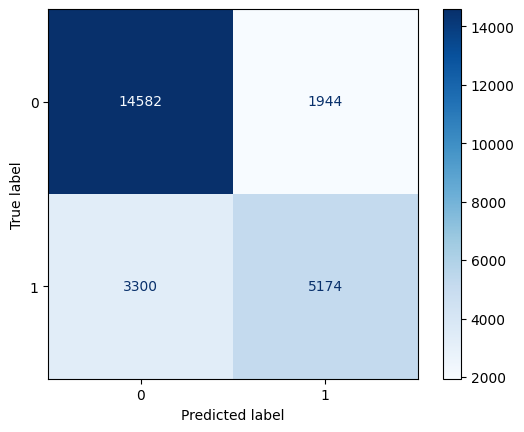

true  negative: 14582
true  positive: 5174
false negative: 3300
false positive: 1944


In [9]:
predicted = cross_val_predict(model, features, labels, cv=cv)
conf = confusion_matrix(labels, predicted)
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap=plt.cm.Blues)
plt.show()

tn = conf[0][0]
tp = conf[1][1]
fn = conf[1][0]
fp = conf[0][1]

print('true  negative: {}'.format(tn))
print('true  positive: {}'.format(tp))
print('false negative: {}'.format(fn))
print('false positive: {}'.format(fp))

12\. We can now try to optimize the parameters of the SVC. Because it would otherwise take a long time, we can select the first 5% of the data set (after shuffling the data set). 

You can do it using the code below, but you need to change the original array names for features and targets to match yours. You will then produce the two arrays "Xlittle, ylittle".

In [10]:
from sklearn.utils import shuffle

ftrs, trgt = shuffle(features, labels, random_state = 13)
number_samples = features.shape[0]
Xlittle, ylittle = ftrs[:int(number_samples*0.05),:], trgt[:int(number_samples*0.05)]
Xlittle.shape #check that everything went as expected

(1250, 8)

13\. Set up and run a GridSearch CV with the following parameters: 

parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}

You can use the code from Lab 8 notebook, but remember to change the scoring parameter to match what you did above.

Note: this might take time! Set verbose = 2 in the GridSearchCV to follow the progress, and set njobs = 4 or more to speed up the process. 

#### Report the scores and parameters values of the best model.

In [11]:
### this fixes zero_division error encountered with precision scoring #######
from sklearn.metrics import precision_score, make_scorer
precision_scorer = make_scorer(precision_score, zero_division=0)
#############################################################################

model = svm.SVC()
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100],\
              'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}

model = GridSearchCV(model, parameters, cv = StratifiedKFold(n_splits=5, shuffle=True), \
                     verbose = 2, n_jobs = -1, scoring = precision_scorer)

model.fit(Xlittle,ylittle)
print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params, best score: 0.6614 {'C': 1, 'class_weight': {1: 1}, 'gamma': 0.01, 'kernel': 'rbf'}
[CV] END ...C=1, class_weight={1: 1}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight={1: 1}, gamma=0.1, kernel=linear; total time=   6.9s
[CV] END .C=1, class_weight={1: 1}, gamma=0.5, kernel=linear; total time=   6.1s
[CV] END C=1, class_weight={1: 3}, gamma=0.01, kernel=linear; total time=   9.9s
[CV] END .C=1, class_weight={1: 3}, gamma=0.5, kernel=linear; total time=   7.0s
[CV] END C=1, class_weight={1: 5}, gamma=0.01, kernel=linear; total time=  14.3s
[CV] END .C=1, class_weight={1: 5}, gamma=0.5, kernel=linear; total time=  14.5s
[CV] END ..C=10, class_weight={1: 1}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ..C=10, class_weight={1: 1}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ..C=10, class_weight={1: 1}, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=10, class_weight={1:

14\. Based on what you found, would you recommend to use a Decision Tree Classifier or a Support Vector Classifier for this problem?

- I would recommend SVC as it performs slightly better